Importing the necessary libraries

In [11]:
import numpy as np
import tensorflow as tf

Define the dataset

In [12]:
input_sequence = "Hello"
target_sequence = "World"

Define vocabulary

In [13]:
vocab = sorted(set(input_sequence + target_sequence))
vocab_size = len(vocab)

Map characters to indices and vice versa

In [14]:
char_to_index = {char: index for index, char in enumerate(vocab)}
index_to_char = np.array(vocab)

Convert input and target sequences to numerical representations

In [15]:
input_indices = np.array([char_to_index[char] for char in input_sequence])
target_indices = np.array([char_to_index[char] for char in target_sequence])

Build our RNN model using TensorFlow

In [16]:
# Define hyperparameters
hidden_size = 64
num_steps = 5
batch_size = 1
learning_rate = 0.01

# Define RNN cell
cell = tf.keras.layers.SimpleRNNCell(hidden_size)

# Define RNN layer
rnn_layer = tf.keras.layers.RNN(cell, return_sequences=True)

# Define output layer
output_layer = tf.keras.layers.Dense(vocab_size)

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, hidden_size, input_length=num_steps),
    rnn_layer,
    output_layer
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (RNN)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model

In [17]:
# Training the model
history = model.fit(input_indices.reshape((batch_size, -1)), target_indices.reshape((batch_size, -1)), epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.9560
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8000 - loss: 1.6287
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 1.2375
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.8453
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.5503
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.3562
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.2307
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.1441
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0816
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0411
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0191
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - 

Test our model

In [18]:
# Function to generate predictions
def generate_text(model, start_string, num_generate=1):
    input_eval = [char_to_index[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    text_generated = []

    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        
        input_eval = tf.expand_dims([predicted_id], 0)
        
        text_generated.append(index_to_char[predicted_id])
    
    return (start_string + ''.join(text_generated))

# Generate text
generated_text = generate_text(model, start_string="Hell", num_generate=5)
print(generated_text)

HelllrdWW


Plotting Training History

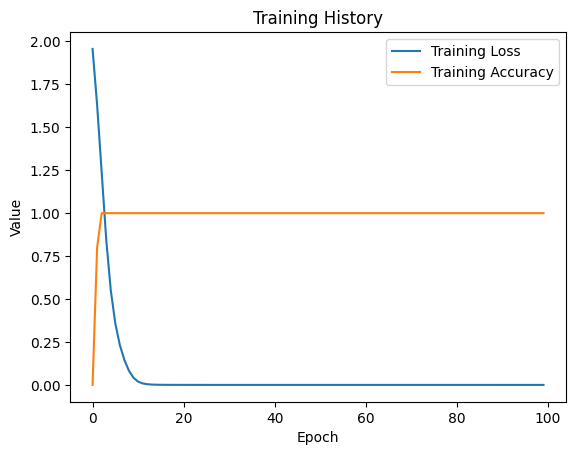

In [19]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')
plt.legend()
plt.show()

Print Classification Report

In [20]:
# Generate test data
test_input_indices = np.array([[char_to_index['H'], char_to_index['e'], char_to_index['l'], char_to_index['l'], char_to_index['o']]])
test_target_indices = np.array([[char_to_index['W'], char_to_index['o'], char_to_index['r'], char_to_index['l'], char_to_index['d']]])

In [21]:
# Prediction
predictions = model.predict(test_input_indices)

# Convert predictions and targets back to characters
predicted_chars = [index_to_char[np.argmax(pred)] for pred in predictions[0]]
target_chars = [index_to_char[ind] for ind in test_target_indices[0]]

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(target_chars, predicted_chars))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
              precision    recall  f1-score   support

           W       1.00      1.00      1.00         1
           d       1.00      1.00      1.00         1
           l       1.00      1.00      1.00         1
           o       1.00      1.00      1.00         1
           r       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



Print Confusion Matrix

In [22]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target_chars, predicted_chars))


[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Print Correlation Matrix

In [37]:
# Compute correlation for each timestep separately
correlations = []
for i in range(predictions_reshaped.shape[0]):
    # Compute Pearson correlation coefficient using only the first 5 elements of predictions
    numerator = np.sum((test_target_indices_flat - target_mean) * (predictions_reshaped[i][:5] - predictions_mean))
    denominator = np.sqrt(np.sum((test_target_indices_flat - target_mean)**2) * np.sum((predictions_reshaped[i][:5] - predictions_mean)**2))
    correlation = numerator / denominator

    correlations.append(correlation)

# Print correlation values
print(correlations)

[0.4343756719122303, 0.02330176833756571, -0.20414466755495866, -0.4176488174593279, 0.4726621433841032]


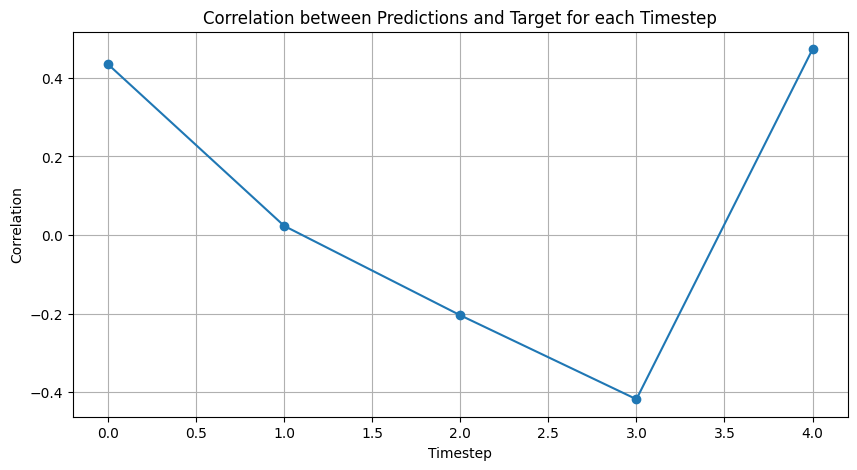

In [38]:
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 5))
plt.plot(range(len(correlations)), correlations, marker='o', linestyle='-')
plt.xlabel('Timestep')
plt.ylabel('Correlation')
plt.title('Correlation between Predictions and Target for each Timestep')
plt.grid(True)
plt.show()